In [52]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].numpy)

(32, 256, 256, 3)
[1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 2 0 1 0 0 1 0]
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[165., 154., 162.],
        [164., 153., 161.],
        [164., 153., 161.],
        ...,
        [134., 121., 130.],
        [125., 112., 121.],
        [139., 126., 135.]],

       [[166., 155., 163.],
        [164., 153., 161.],
        [161., 150., 158.],
        ...,
        [125., 112., 121.],
        [113., 100., 109.],
        [115., 102., 111.]],

       [[168., 157., 165.],
        [163., 152., 160.],
        [159., 148., 156.],
        ...,
        [127., 114., 123.],
        [124., 111., 120.],
        [120., 107., 116.]],

       ...,

       [[182., 172., 171.],
        [179., 169., 168.],
        [177., 167., 166.],
        ...,
        [157., 143., 143.],
        [151., 137., 137.],
        [150., 136., 136.]],

       [[178., 168., 167.],
        [177., 167., 166.],
        [177., 167.,

## VISUALIZATION

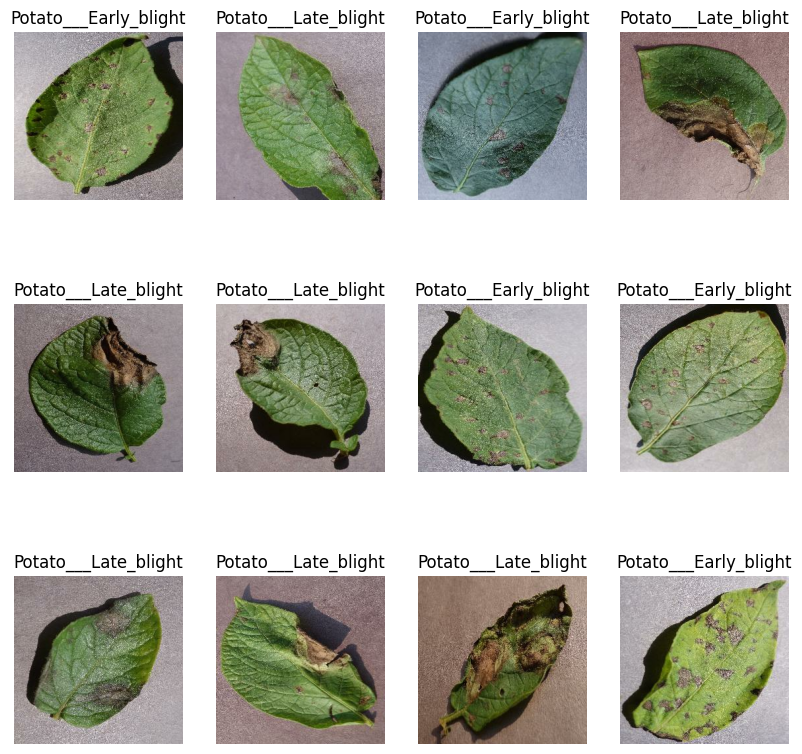

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

## Spliting the datasets

## 80 % ==>> training
## 20% ==>> test and validation

In [12]:
train_size= 0.8
per_train= len(dataset)*train_size
per_train

54.400000000000006

In [13]:
train_ds = dataset.take(54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [15]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)

In [17]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1, test_split = 0.1, shuffle= True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
    

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [26]:
data_augmetation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmetation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape= input_shape)

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [30]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
54/54 [==============================] - 126s 2s/step - loss: 0.9044 - accuracy: 0.4751 - val_loss: 0.9091 - val_accuracy: 0.4524
Epoch 2/10
54/54 [==============================] - 106s 2s/step - loss: 0.8202 - accuracy: 0.5856 - val_loss: 0.5784 - val_accuracy: 0.7679
Epoch 3/10
54/54 [==============================] - 102s 2s/step - loss: 0.5023 - accuracy: 0.7992 - val_loss: 0.3251 - val_accuracy: 0.8750
Epoch 4/10
54/54 [==============================] - 96s 2s/step - loss: 0.3523 - accuracy: 0.8513 - val_loss: 0.2089 - val_accuracy: 0.9226
Epoch 5/10
54/54 [==============================] - 96s 2s/step - loss: 0.2756 - accuracy: 0.8918 - val_loss: 0.2484 - val_accuracy: 0.9226
Epoch 6/10
54/54 [==============================] - 93s 2s/step - loss: 0.2532 - accuracy: 0.8970 - val_loss: 0.2702 - val_accuracy: 0.8988
Epoch 7/10
54/54 [==============================] - 91s 2s/step - loss: 0.2052 - accuracy: 0.9207 - val_loss: 0.4387 - val_accuracy: 0.8155
Epoch 8/10
54/54 

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 355ms/step - loss: 0.1808 - accuracy: 0.9397


In [32]:
scores

[0.18084202706813812, 0.9396551847457886]

In [33]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
acc = history.history['accuracy']
val_acc = history.history ['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

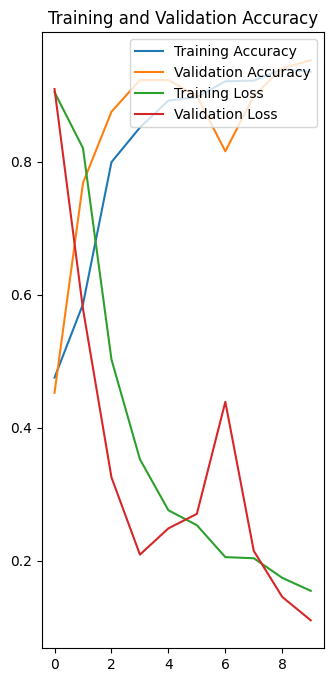

In [41]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')
plt.show()

First image to predict
First image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 328ms/step
predicted label: Potato___Late_blight


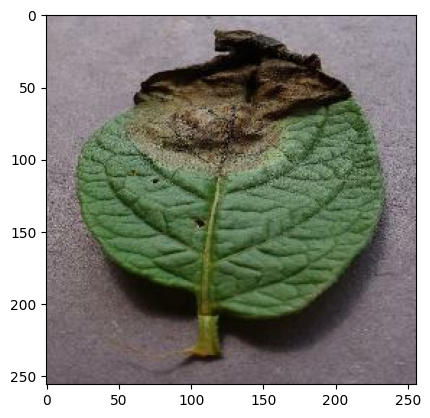

In [62]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label  = label_batch[0]

    print('First image to predict')
    plt.imshow(first_image)
    print("First image's actual label:", class_names[first_label])

    batch_predict = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_predict[0])])

In [82]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(image_batch[i].numpy())
    img_array = tf.expand_dims(img_array, 0 )

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence  = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 46ms/step


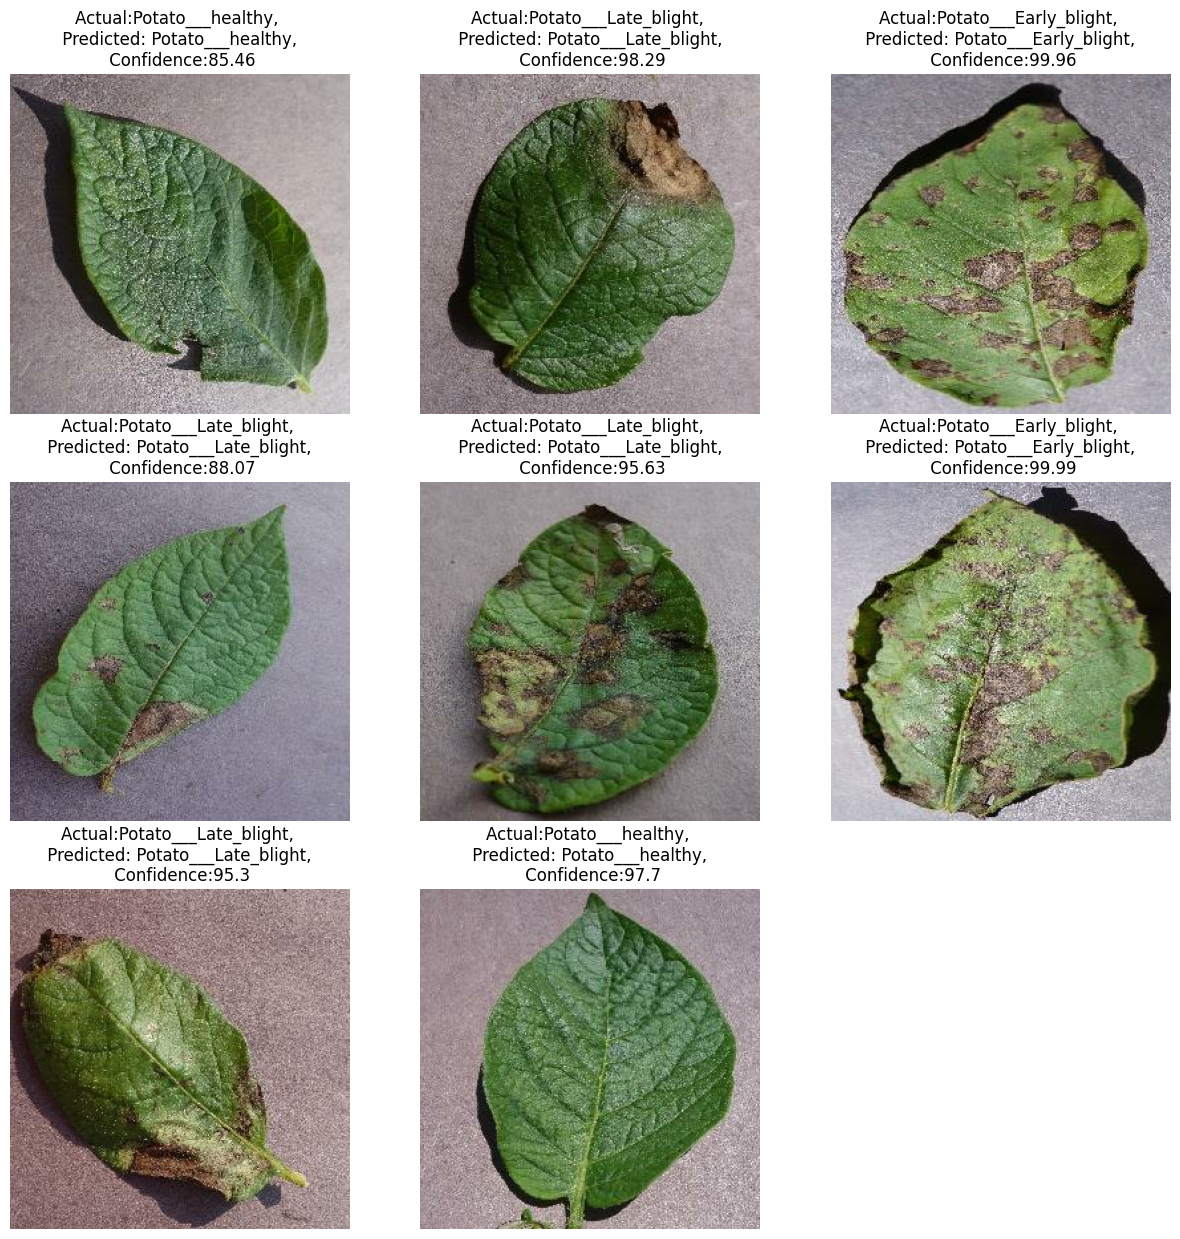

In [88]:
plt.figure(figsize = (15,15))

for image_batch, label_batch in test_ds.take(1):
    num_images = min(len(image_batch), 9)  # Get the smaller of 9 or the actual number of images
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype(np.uint8))
        predicted_class, confidence = predict(model, image_batch[i].numpy)
        actual_class = class_names[label_batch[i]]
        plt.title(f"Actual:{actual_class}, \n Predicted: {predicted_class}, \n Confidence:{confidence}")
        plt.axis('off')

In [89]:
import os 
print(os.listdir('../models/'))

['1.0 Version']


In [87]:
model_version = 1.0
model.save(f"../models/{model_version} Version")

INFO:tensorflow:Assets written to: ../models/1.0 Version\assets


INFO:tensorflow:Assets written to: ../models/1.0 Version\assets
